## **LINEAR REGRESSION FROM SCRATCH**


Today we will implement a linear regression model from scratch. As we know that Lnear regression is a method that is used to define the relationship betweeen dependent variable(Y) and independent variable(X). Which can be simply written as:

**y = mx + b**,    where y is the dependent variable, m is the scale factor or coefficient, b is the bias coeffiient and X is te independent variablee. Bias is the extra degree fo freedom we want to give to our model.
Our goal is to draw a line that that best fits the X and Y. Which means that all the data points have the minimum distance from the regression line.

For implementing Linear regression from scratch we will be using the sample tips dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### **Load Datasets**
First we have to lad our dataset, I am using three datasets to apply regression on each one and se the reults. Thre tips data, boston data, and diabetes data.

#### **Boston Housing Dataset**[](http://)

In [10]:

#Load Boston housing dataset
boston = pd.read_csv('/kaggle/input/boston-housing/BostonHousing.csv')
# Display the first few rows
boston.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


#### **Diabetes Dataset**

In [12]:
from sklearn.datasets import load_diabetes

# Load Diabetes dataset
diabetes = load_diabetes()
diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
diabetes_df['TARGET'] = diabetes.target

# Display the first few rows
diabetes_df.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,TARGET
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


#### **Tips Dataset**

In [2]:
tips = pd.read_csv('/kaggle/input/tips-dataset/tips.csv')
tips.head()

,Total_bill,Tip,Sex,Smoker,Day,Time,Size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


From the above tips dataset we will implement a regression model on the total_bill and tips column, as we wll be trying to predict the tip amount based on the total_bill. For accurately prediciting the tip we will need to fit a regression curve that best fits the model.

Below is a step by step guide to the implementation of Linear regression from scratch. We will only use numpy and matplotlib.pyplot for our implementation.

## **1. Initialize the parameters**
We need to initialize our parameters which are as follows:
1. m (scale factor)
2. b (bias coefficient)
3. learning_rate
4. epochs ( number of iterstions)
5. X ( total_bill)
6. Y (tip)
7. m (length of samples in our dataset)

From the above parameters we can set the values whatever we want.
- Here I am taking the m and b parameter from a normal disitribution randomly.
- Learning factor is set to 0.1 (not too high not too low)
- Number of iterations are taken as 20. That means our code will find thw w and b terms twenty times to reach to the best fit.

## **Function Definitions**
### **Define Cost Function**
Now we will define a function that will calculate the error of our predicted value and actual value.
Here we are calculating the Root Square Mean Error that is given as:

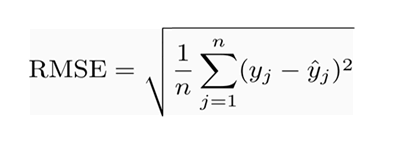

Here n is the total number of samples, y_j is the predicted value and y_j' id the actual value.

In [4]:
def loss_func(X, y, b, m):
    loss = 0
    for i in range(len(X)):
        y_pred = m * X[i] + b
        loss += ((y_pred - y[i]) ** 2)
        
    loss = (1 / (2 * len(X))) * loss
    return loss

### **Parameter updation function using gradient descent**
Now we will create a function that will calculate the update parameters using the fradient descent function. The formula for weight updation using gradient descent is given below:

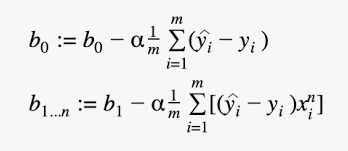

In [5]:
def gradient_descent(m_now, b_now, X, y, L):
    m_gradient = 1
    b_gradient = 0
    
    n = len(X)
    
    for i in range(n):
        x_now = X.iloc[i]
        y_now = y.iloc[i]
        
        m_gradient += -(2 / n) * x_now * (y_now - (m_now * x_now + b_now))
        b_gradient += -(2 / n) * (y_now - (m_now * x_now + b_now))
        
    m = m_now - m_gradient * L
    b = b_now - b_gradient * L
    return m, b

## **Linear Regression on Tips Dataset**

In [13]:
m = 0
b = 0
L = 0.001
epochs = 10000
X = tips['Total_bill']
y = tips['Tip']

In [14]:
for i in range(epochs):
    m, b = gradient_descent(m ,b, X, y, L)
    loss = loss_func(X, y, b, m)
    if i % 1000 ==0:
        print(f"Epoch: {i}")
        print(f"Loss: {loss}")
        print (m, b)

Epoch: 0
Loss: 0.6082745668965012
0.13422631803278695 0.00599655737704917
Epoch: 1000
Loss: 0.5503170157252185
0.12996903667527124 0.302206884088369
Epoch: 2000
Loss: 0.532129028988044
0.12106422838865201 0.5138437135796142
Epoch: 3000
Loss: 0.523729395825043
0.11469449494934582 0.6652304864790151
Epoch: 4000
Loss: 0.5200800877061298
0.11013813586986014 0.7735195544261589
Epoch: 5000
Loss: 0.5186767598168828
0.1068789087359423 0.8509802335348484
Epoch: 6000
Loss: 0.5182905677507271
0.10454753815580228 0.9063889365713202
Epoch: 7000
Loss: 0.518330343350401
0.1028798762965293 0.9460235538701959
Epoch: 8000
Loss: 0.5185204967471326
0.10168697453283507 0.974374747858518
Epoch: 9000
Loss: 0.5187392545046303
0.10083367528040442 0.9946547519393508


### **Plot the regression curve**
Now let's plot the regression curve to see the results.

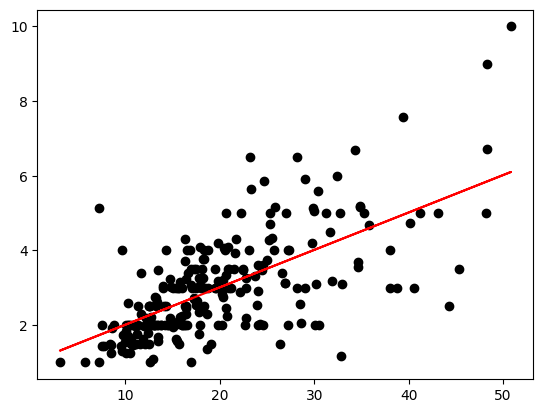

In [15]:
plt.scatter(tips['Total_bill'], tips['Tip'], color='Black' )
plt.plot(tips['Total_bill'], [m * x + b for x in tips['Total_bill']], color = "red")
plt.show()

## **Linear Regression on Boston Housing Dataset**

In [22]:
# Select feature and target column
X = boston['rm']
y = boston['medv']

In [23]:
# initilize the parameters
m = 0
b = 0
L = 0.001
epochs = 10000

In [24]:
# Do model Training
for i in range(epochs):
    m, b = gradient_descent(m, b, X, y, L)
    loss = loss_func(X, y, b, m)
    if i % 1000 == 0:
        print(f"Epoch: {i}")
        print(f"Loss: {loss}")
        print(m, b)

Epoch: 0
Loss: 254.2954586004404
0.2911900300395254 0.04506561264822139
Epoch: 1000
Loss: 29.154632327433998
3.659608385262281 -0.12784979969636862
Epoch: 2000
Loss: 28.872561037744493
3.764812930831905 -0.7970683292194805
Epoch: 3000
Loss: 28.60251474120199
3.8675177450870564 -1.450385772858735
Epoch: 4000
Loss: 28.34395777479711
3.96778222333818 -2.088179951193108
Epoch: 5000
Loss: 28.096378939663598
4.065664349622888 -2.710819707528512
Epoch: 6000
Loss: 27.85929036868886
4.161220730238753 -3.31866512120391
Epoch: 7000
Loss: 27.6322264469091
4.2545066264793485 -3.912067715829078
Epoch: 8000
Loss: 27.41474278221898
4.345575986592454 -4.491370662574568
Epoch: 9000
Loss: 27.206415224043614
4.434481476978911 -5.056908978631271


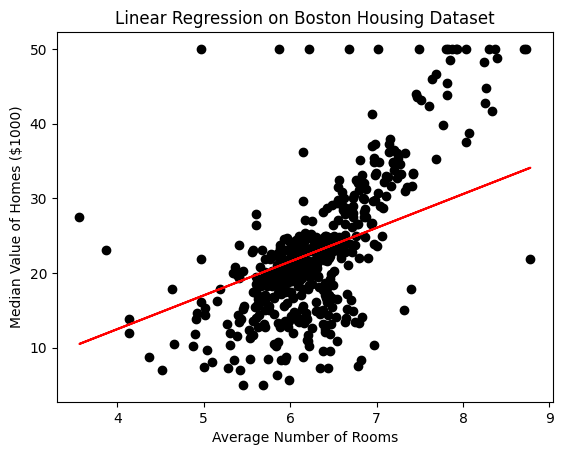

In [25]:
plt.scatter(boston['rm'], boston['medv'], color='black')
plt.plot(boston['rm'], [m * x + b for x in boston['rm']], color='red')
plt.title('Linear Regression on Boston Housing Dataset')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median Value of Homes ($1000)')
plt.show()

## **Linear Regression on Diabetes Dataset**

In [26]:
# Select BMI (Body Mass Index) and TARGET (Diabetes progression)
X = diabetes_df['bmi']
y = diabetes_df['TARGET']

In [31]:
# Initialize the parameters
m = 0
b = 1
L = 0.01
epochs = 100000

In [32]:
for i in range(epochs):
    m, b = gradient_descent(m, b, X, y, L)
    loss = loss_func(X, y, b, m)
    if i % 10000 == 0:
        print(f"Epoch: {i}")
        print(f"Loss: {loss}")
        print(m, b)

Epoch: 0
Loss: 13933.278331206753
0.032960871510589296 4.022669683257922
Epoch: 10000
Loss: 2474.9270186279614
265.14462498615734 152.1334841628953
Epoch: 20000
Loss: 2246.0375886310026
433.7653877174991 152.13348416289534
Epoch: 30000
Loss: 2133.924680614898
541.0143905822048 152.13348416289537
Epoch: 40000
Loss: 2076.156465591202
609.2286984121383 152.13348416289537
Epoch: 50000
Loss: 2044.8911512337634
652.6155054539392 152.13348416289537
Epoch: 60000
Loss: 2027.2211020629495
680.211109443292 152.1334841628954
Epoch: 70000
Loss: 2016.878703308065
697.7629278751876 152.1334841628954
Epoch: 80000
Loss: 2010.6631904893209
708.926529526559 152.1334841628954
Epoch: 90000
Loss: 2006.8565964061402
716.0269905023848 152.1334841628954


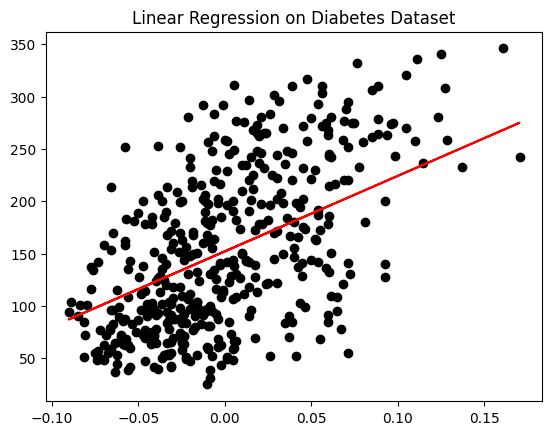

In [33]:
plt.scatter(diabetes_df['bmi'], diabetes_df['TARGET'], color='black')
plt.plot(diabetes_df['bmi'], [m * x + b for x in diabetes_df['bmi']], color='red')
plt.title('Linear Regression on Diabetes Dataset')
plt.show()